In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.utils.vis_utils import plot_model

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_size=60000
test_size=10000

In [ ]:
train_images = train_images.reshape(train_size, 28, 28, 1)
train_images = train_images.astype('float32') / 255

In [ ]:
test_images = test_images.reshape(test_size, 28, 28, 1)
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels_one_hot = keras.utils.to_categorical(train_labels)

In [ ]:
test_labels_one_hot = keras.utils.to_categorical(test_labels)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

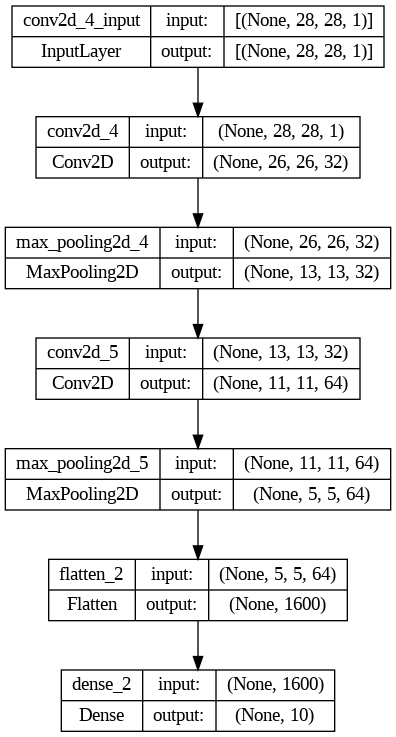

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels_one_hot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1515 - accuracy: 0.9553
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9907
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0225 - accuracy: 0.9926


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9916


In [ ]:
model.save('model.h5')

In [ ]:
model = tf.keras.models.load_model('model.h5')

In [ ]:
from keras.preprocessing import image
from PIL import Image

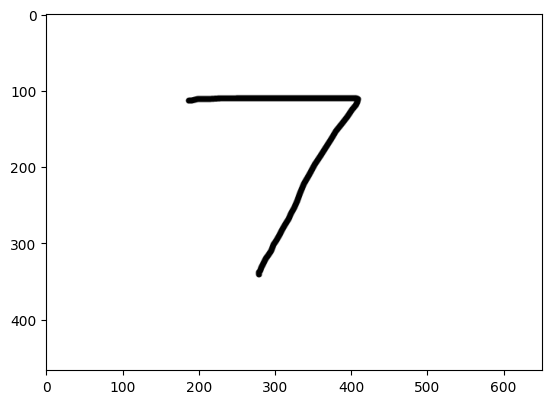

1/1 [==============================] - 0s 61ms/step
Predicted digit: 7


In [ ]:
image3 = plt.imread('/content/uro.png')
plt.imshow(image3)
plt.show()
uploaded_image2 = Image.open('/content/uro.png').convert('L')
uploaded_image2 = uploaded_image2.resize((28, 28))
uploaded_image_array2 = np.array(uploaded_image2)
uploaded_image_array2 = uploaded_image_array2.astype('float32') / 255
uploaded_image_array2 = np.reshape(uploaded_image_array2, (1, 28, 28, 1))
predictions2 = model.predict(uploaded_image_array2)
predicted_digit2 = np.argmax(predictions2[0])
print('Predicted digit:', predicted_digit2)